<a href="https://colab.research.google.com/github/vamshikrishna1032000/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

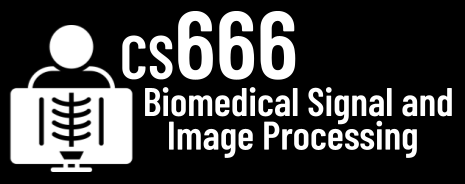
#Assignment 5

In [2]:
# NAME: VAMSHI KRISHNA KUTURU

In [3]:
# In this assignment, we will visualize and explore a CT scan!

In [4]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.1 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [6]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [7]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

" 220 SLICES. "

In [8]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [9]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

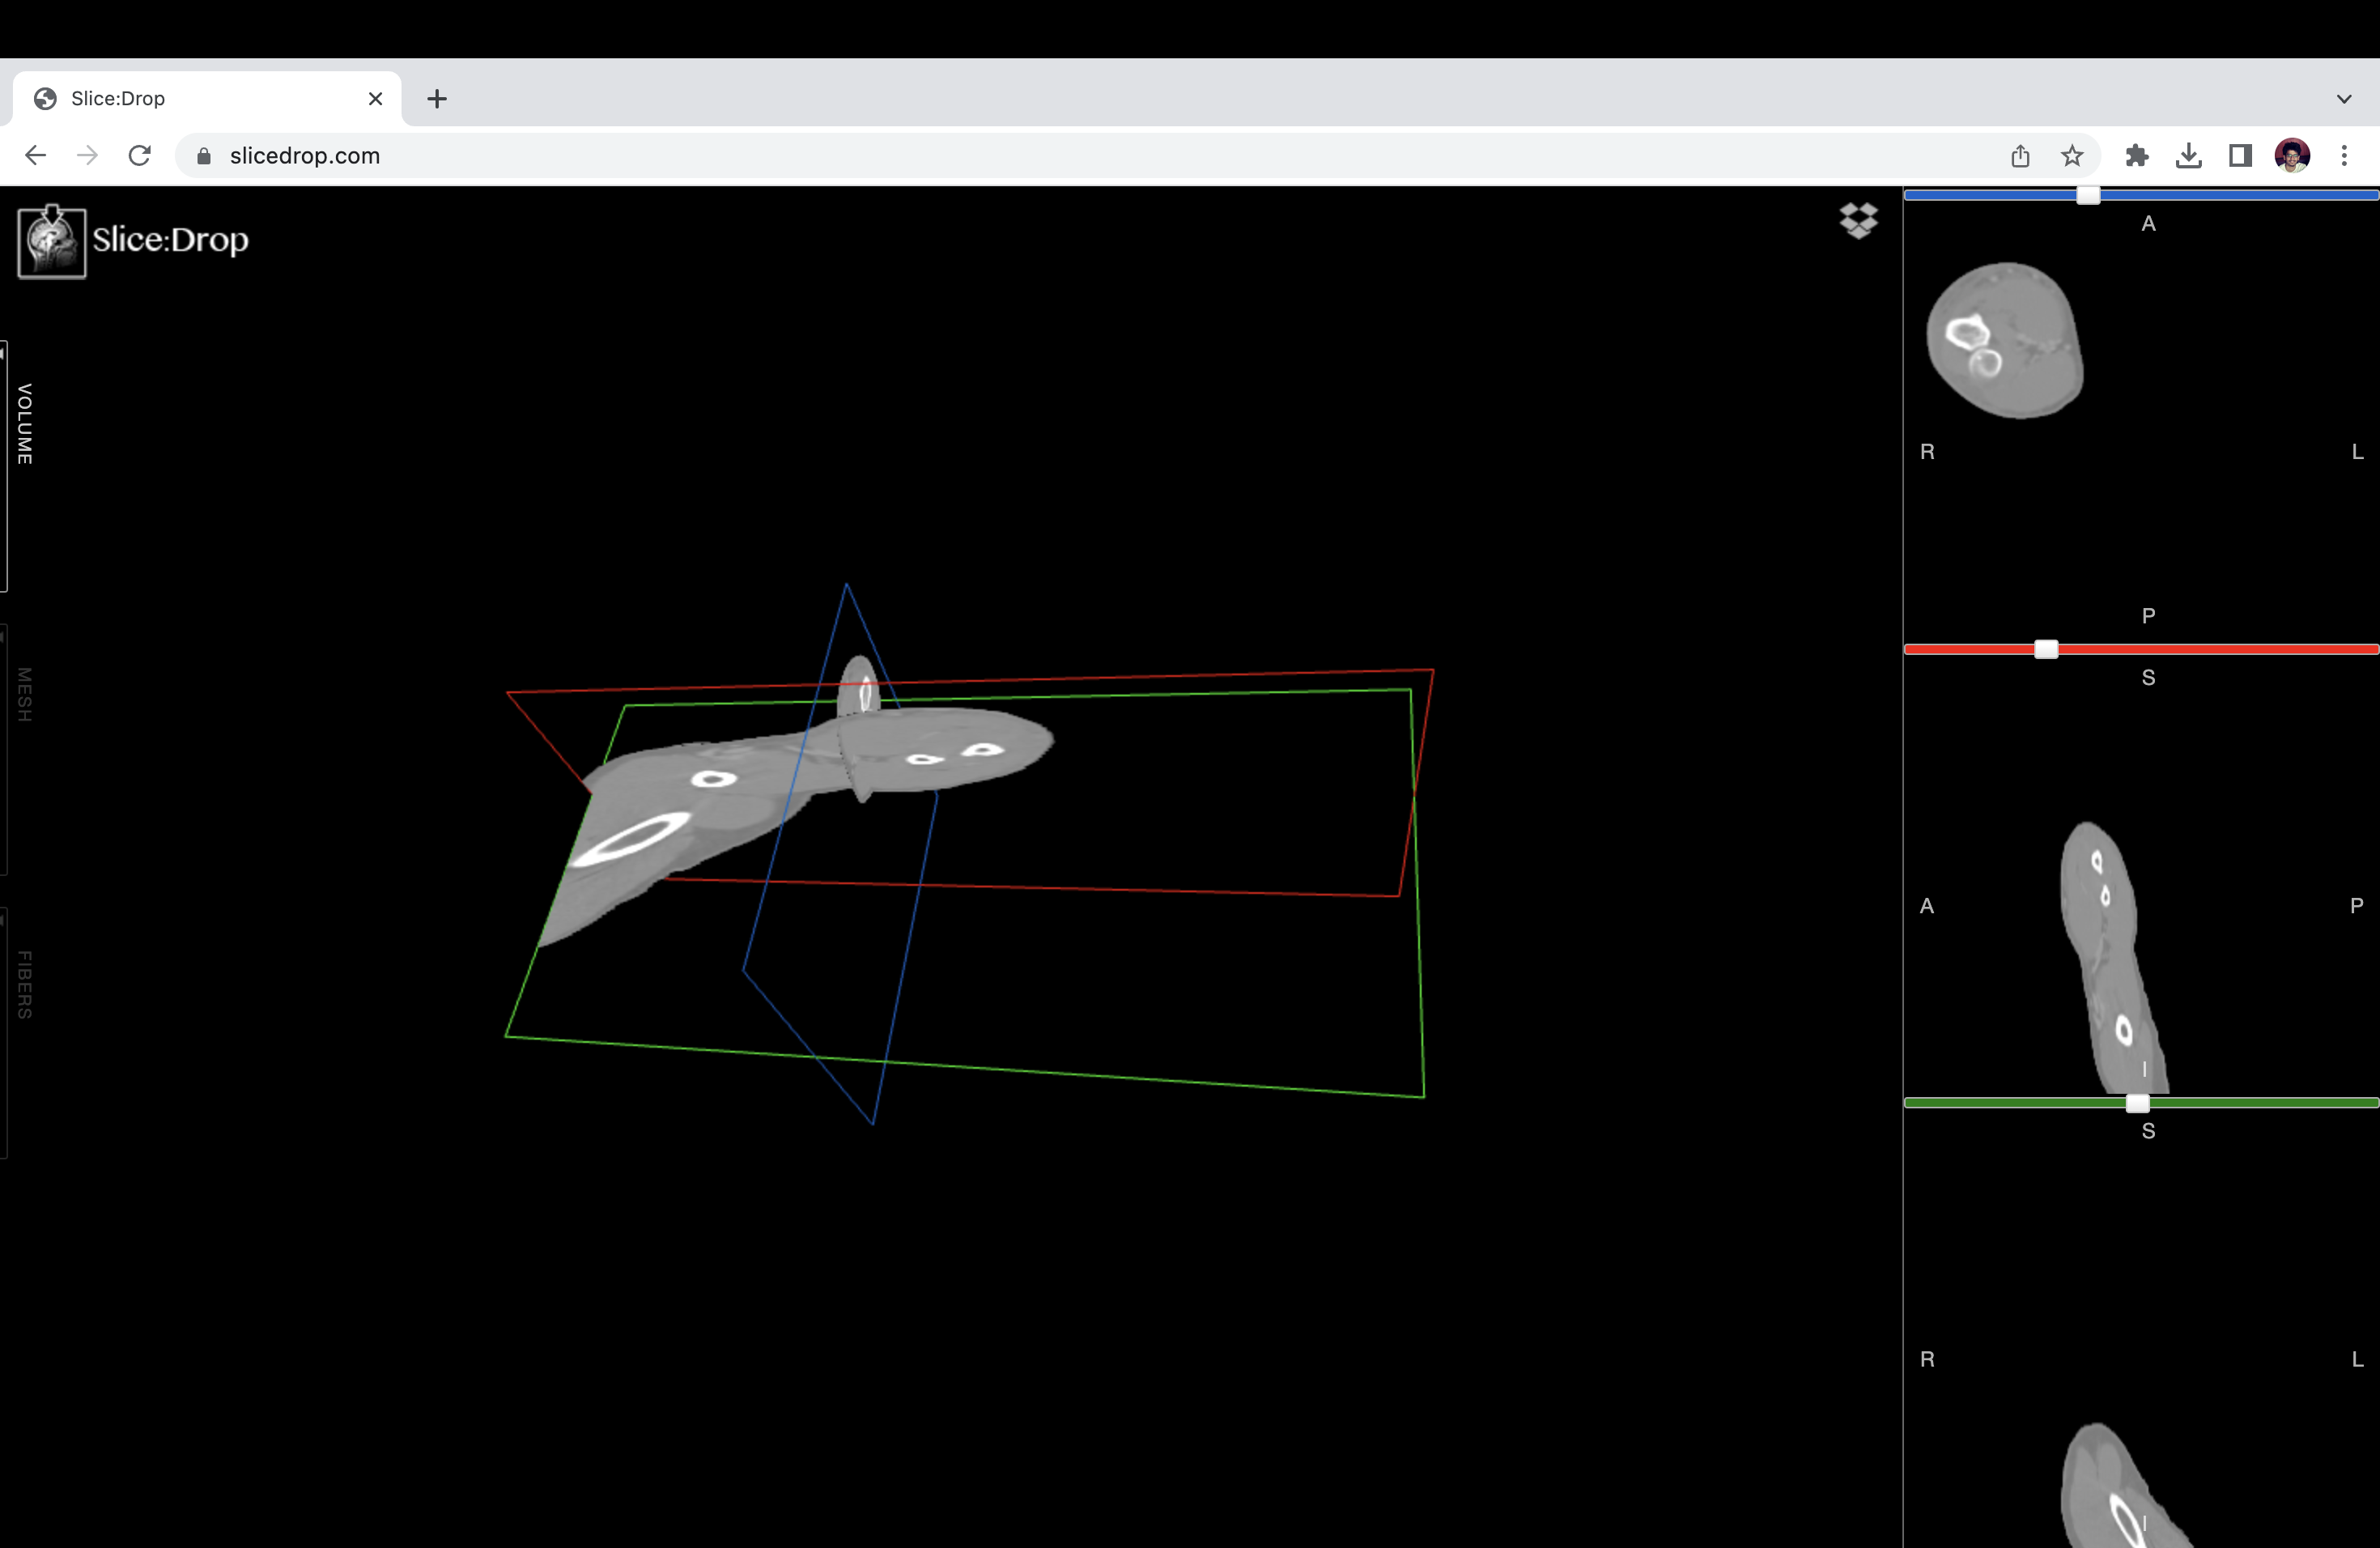

In [10]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [11]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click

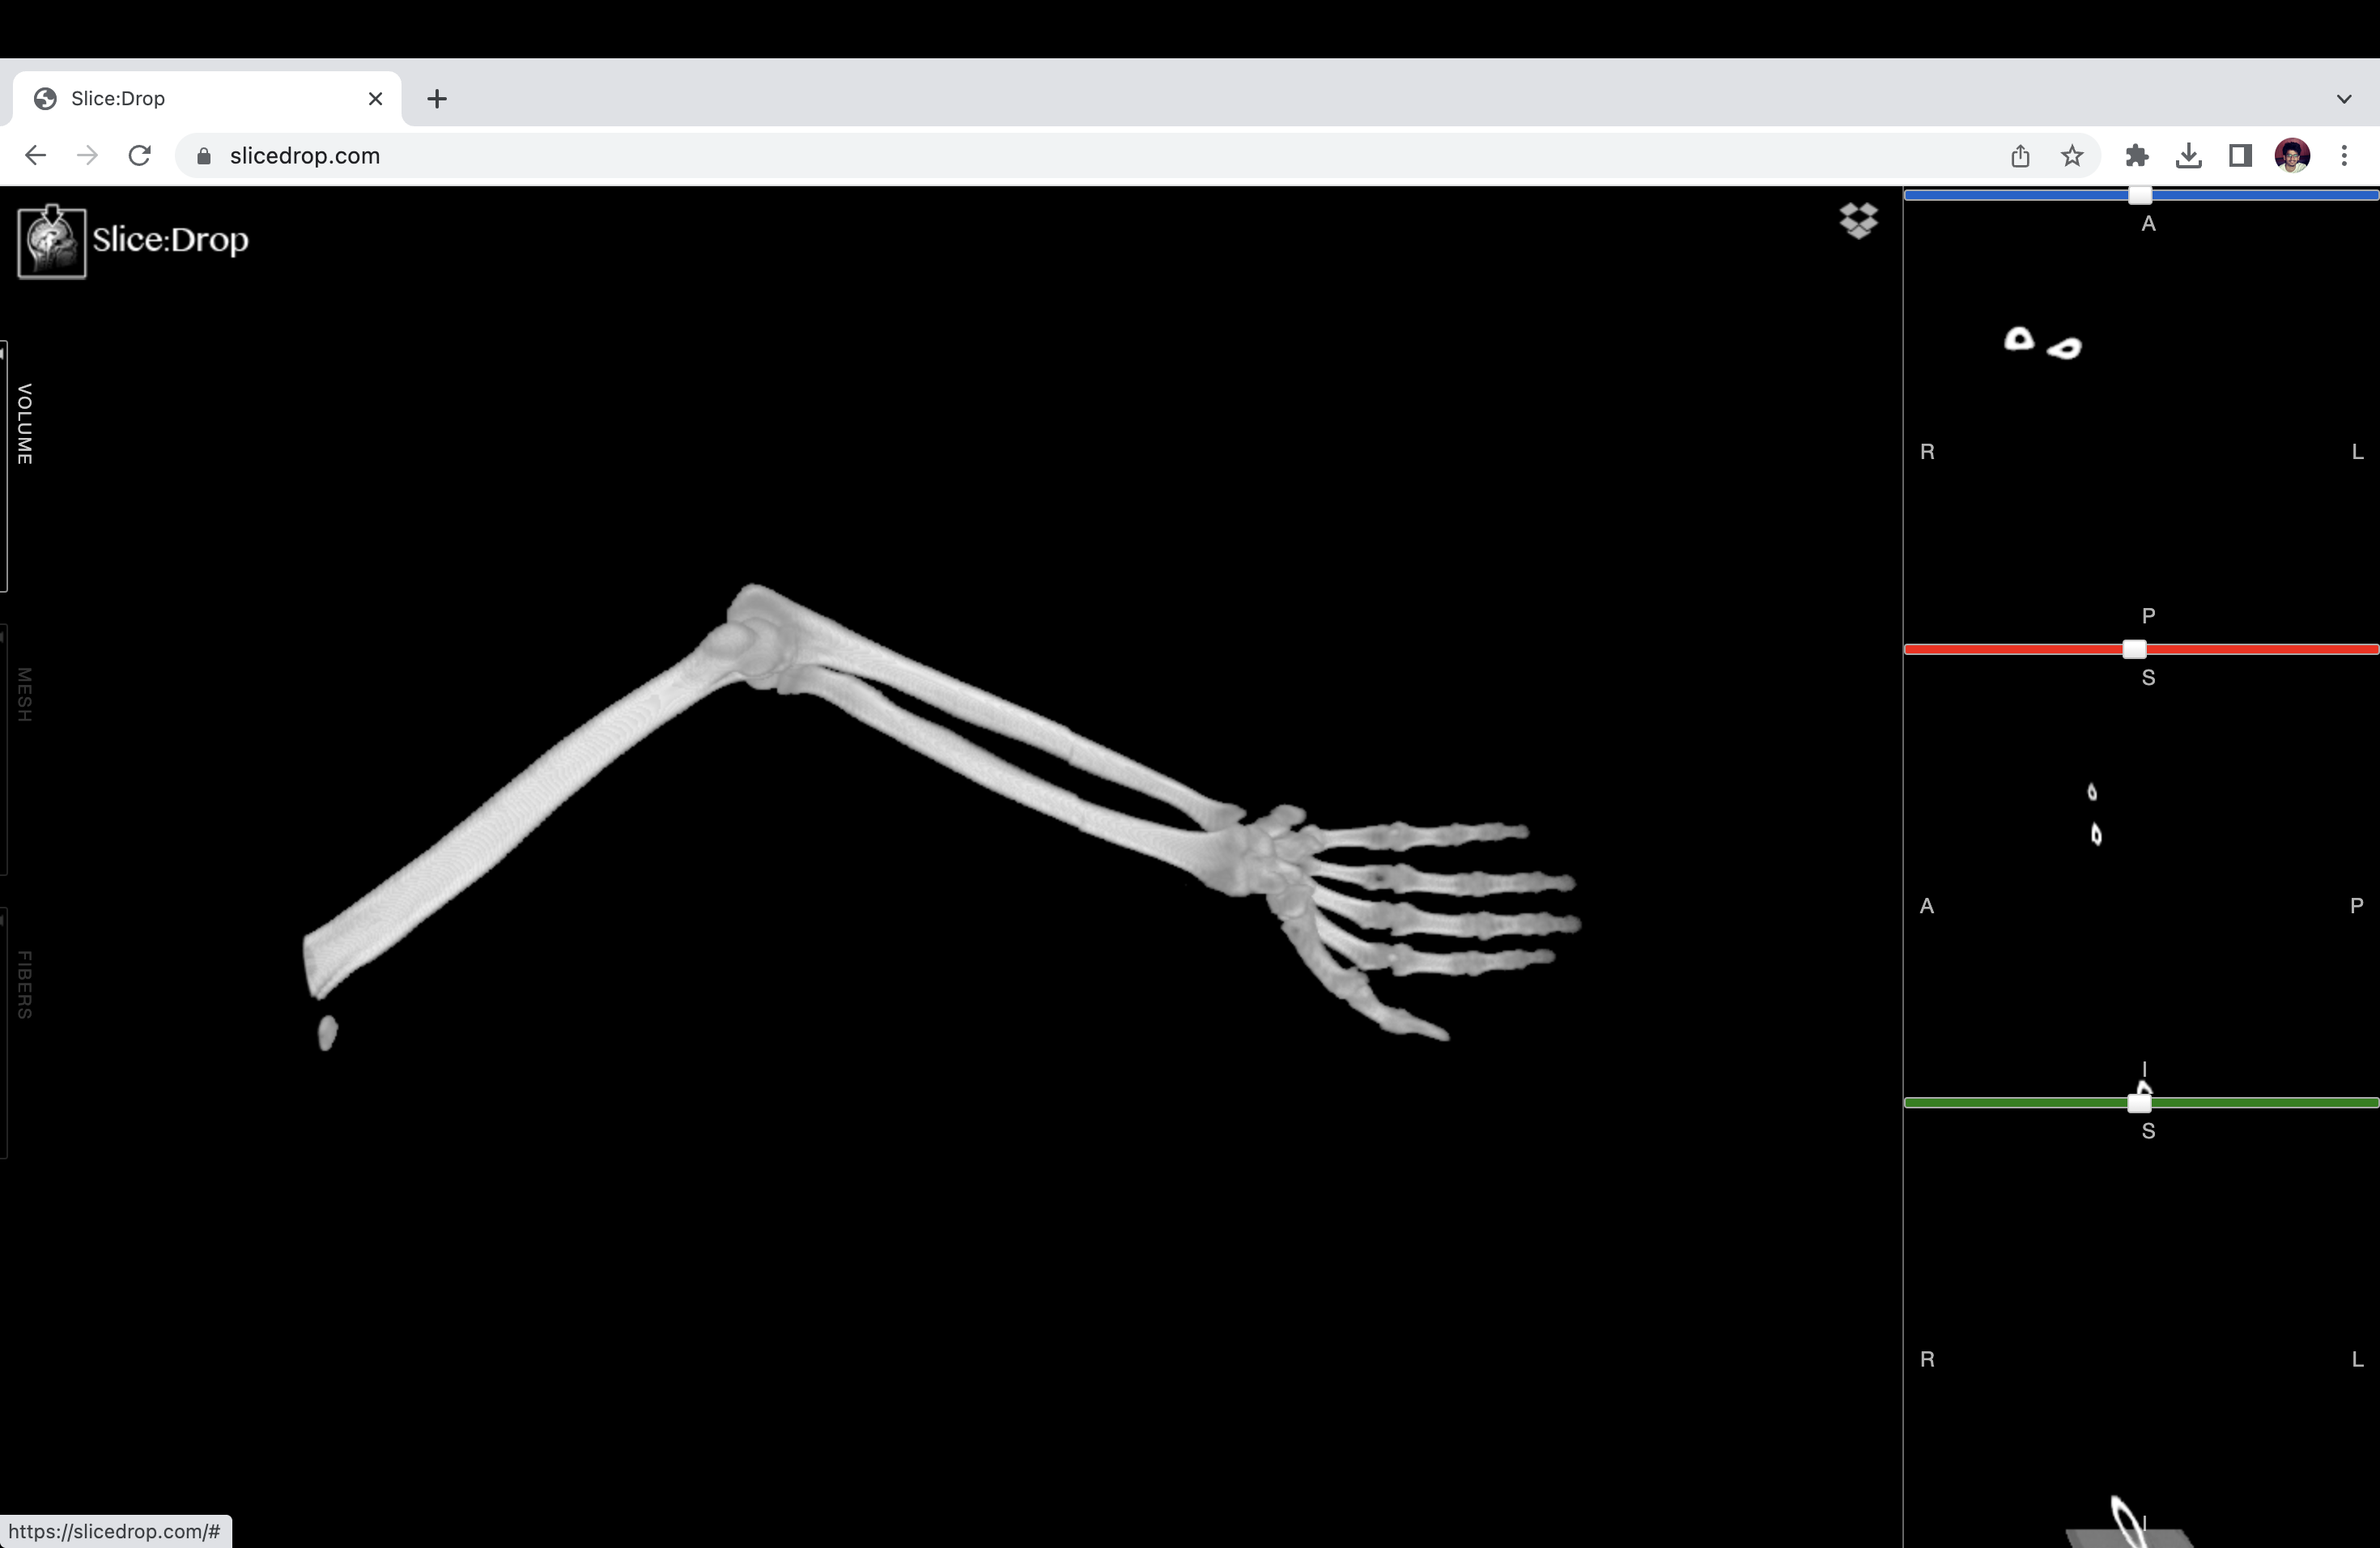

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [12]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [13]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [14]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [15]:
from pydicom import dcmread

In [16]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
import numpy as np
import pydicom

# Set the directory where the DICOM files are located
DIR = './ct'
files = os.listdir(DIR)

# Load the dimensions of a single DICOM file to create the 3D numpy array
first_file = pydicom.dcmread(os.path.join(DIR, files[0]))
rows = int(first_file.Rows)
cols = int(first_file.Columns)
slices = len(files)

# Create the 3D numpy array
volume = np.zeros((rows, cols, slices), dtype=np.int16)

# Loop through all the DICOM files and store them in the numpy array
for i, filename in enumerate(files):
    ds = pydicom.dcmread(os.path.join(DIR, filename))
    volume[:, :, i] = ds.pixel_array


In [17]:
list_of_files = os.listdir(DIR)
print("List of files: ", list_of_files)

List of files:  ['IM-0001-0131.dcm', 'IM-0001-0151.dcm', 'IM-0001-0035.dcm', 'IM-0001-0020.dcm', 'IM-0001-0102.dcm', 'IM-0001-0086.dcm', 'IM-0001-0037.dcm', 'IM-0001-0180.dcm', 'IM-0001-0152.dcm', 'IM-0001-0042.dcm', 'IM-0001-0211.dcm', 'IM-0001-0118.dcm', 'IM-0001-0111.dcm', 'IM-0001-0082.dcm', 'IM-0001-0021.dcm', 'IM-0001-0107.dcm', 'IM-0001-0057.dcm', 'IM-0001-0061.dcm', 'IM-0001-0099.dcm', 'IM-0001-0207.dcm', 'IM-0001-0043.dcm', 'IM-0001-0010.dcm', 'IM-0001-0155.dcm', 'IM-0001-0083.dcm', 'IM-0001-0104.dcm', 'IM-0001-0034.dcm', 'IM-0001-0193.dcm', 'IM-0001-0120.dcm', 'IM-0001-0170.dcm', 'IM-0001-0110.dcm', 'IM-0001-0094.dcm', 'IM-0001-0062.dcm', 'IM-0001-0167.dcm', 'IM-0001-0002.dcm', 'IM-0001-0078.dcm', 'IM-0001-0206.dcm', 'IM-0001-0123.dcm', 'IM-0001-0097.dcm', 'IM-0001-0139.dcm', 'IM-0001-0208.dcm', 'IM-0001-0204.dcm', 'IM-0001-0029.dcm', 'IM-0001-0195.dcm', 'IM-0001-0164.dcm', 'IM-0001-0142.dcm', 'IM-0001-0018.dcm', 'IM-0001-0036.dcm', 'IM-0001-0065.dcm', 'IM-0001-0068.dcm', 'IM

In [18]:
print("Sorted list:")
list_of_files = sorted(list_of_files)
print(list_of_files)
print("Total: ", len(list_of_files))

Sorted list:
['IM-0001-0001.dcm', 'IM-0001-0002.dcm', 'IM-0001-0003.dcm', 'IM-0001-0004.dcm', 'IM-0001-0005.dcm', 'IM-0001-0006.dcm', 'IM-0001-0007.dcm', 'IM-0001-0008.dcm', 'IM-0001-0009.dcm', 'IM-0001-0010.dcm', 'IM-0001-0011.dcm', 'IM-0001-0012.dcm', 'IM-0001-0013.dcm', 'IM-0001-0014.dcm', 'IM-0001-0015.dcm', 'IM-0001-0016.dcm', 'IM-0001-0017.dcm', 'IM-0001-0018.dcm', 'IM-0001-0019.dcm', 'IM-0001-0020.dcm', 'IM-0001-0021.dcm', 'IM-0001-0022.dcm', 'IM-0001-0023.dcm', 'IM-0001-0024.dcm', 'IM-0001-0025.dcm', 'IM-0001-0026.dcm', 'IM-0001-0027.dcm', 'IM-0001-0028.dcm', 'IM-0001-0029.dcm', 'IM-0001-0030.dcm', 'IM-0001-0031.dcm', 'IM-0001-0032.dcm', 'IM-0001-0033.dcm', 'IM-0001-0034.dcm', 'IM-0001-0035.dcm', 'IM-0001-0036.dcm', 'IM-0001-0037.dcm', 'IM-0001-0038.dcm', 'IM-0001-0039.dcm', 'IM-0001-0040.dcm', 'IM-0001-0041.dcm', 'IM-0001-0042.dcm', 'IM-0001-0043.dcm', 'IM-0001-0044.dcm', 'IM-0001-0045.dcm', 'IM-0001-0046.dcm', 'IM-0001-0047.dcm', 'IM-0001-0048.dcm', 'IM-0001-0049.dcm', 'IM-00

In [19]:
print('number of rows=', rows)
print('number of columns=', cols)
print('number of slices=', slices)
print(volume.shape)


files =[dcmread(os.path.join(DIR,files)) for files in list_of_files]
single_file = files[0].pixel_array
print(single_file)
print("Dimensions: ", single_file.shape)

number of rows= 454
number of columns= 512
number of slices= 220
(454, 512, 220)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Dimensions:  (454, 512)


In [20]:
for i in range(slices):
  volume[:, :, i]=(files[i].pixel_array)
print(volume)

print(volume.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(454, 512, 220)


In [21]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

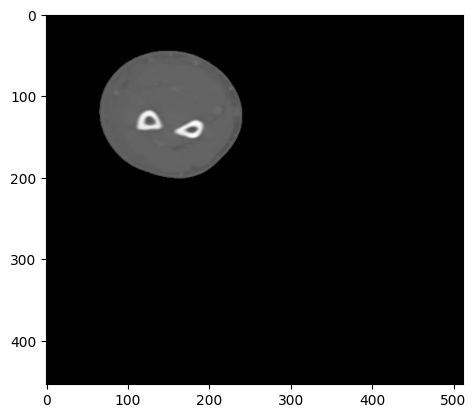

In [22]:
import matplotlib.pyplot as plt
axial = volume[:, :, 110]
plt.imshow(axial, cmap='gray')
plt.show()

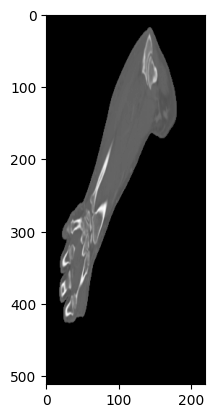

In [23]:
sagittal = volume[110, :, :]
plt.imshow(sagittal, cmap='gray')
plt.show()

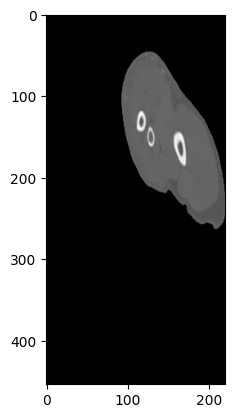

In [24]:
coronal = volume[:, 110, :]
plt.imshow(coronal, cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [25]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [26]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [27]:
window = files[0].WindowWidth
level = files[0].WindowCenter
rescale = files[0].RescaleIntercept

print("Window: ", window)
print("Level: ", level)
print("Rescale: ", rescale)

Window:  410
Level:  30
Rescale:  -1024


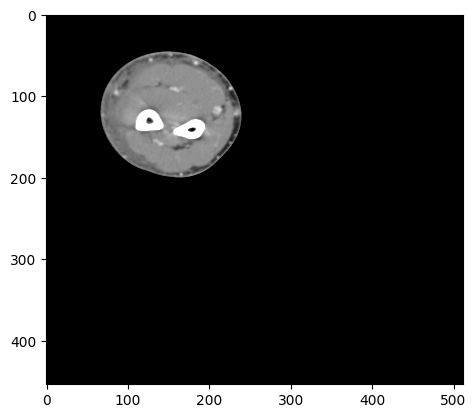

In [28]:
vmin = level - window/2
vmax = level + window/2
plt.imshow(axial + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

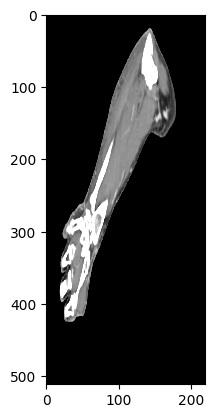

In [29]:
vmin = level - window/2
vmax = level + window/2
plt.imshow(sagittal + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

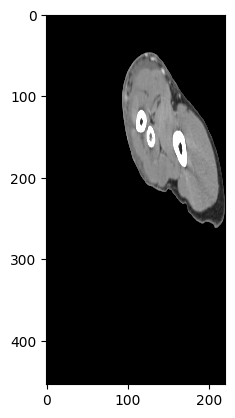

In [30]:
vmin = level - window/2
vmax = level + window/2
plt.imshow(coronal + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [31]:
print(vmin)
print(vmax)

-175.0
235.0


In [32]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

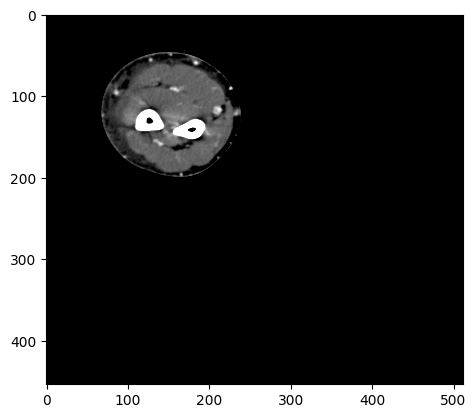

In [33]:
# Axial
window = 200
level = 80
vmin = level - window/2
vmax = level + window/2
plt.imshow(axial + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

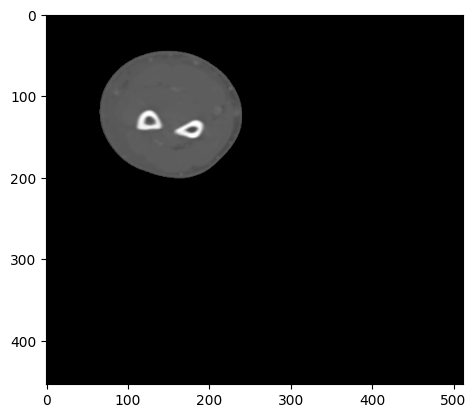

In [34]:
window = 2514
level = 396
vmin = level - window/2
vmax = level + window/2
plt.imshow(axial + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

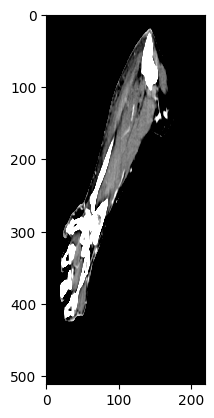

In [35]:
# Sagittal
window = 150
level = 60
vmin = level - window/2
vmax = level + window/2
plt.imshow(sagittal + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

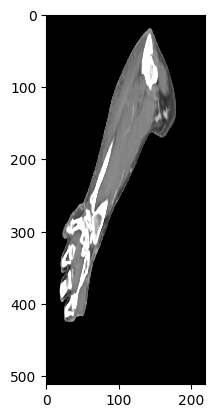

In [36]:
window = 550
level = 50
vmin = level - window/2
vmax = level + window/2
plt.imshow(sagittal + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [37]:
# Which values make sense and why?

' As we can see, in axial when we used window=200 and level=80, it is more clear than compared to the values window = 2514, level = 396. I can say that contrast and brightness is the major difference we can observe here. It is better on the lesser values and as the values increases, the clarity decreases. '

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [38]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [39]:
# TODO: YOUR CODE TO SEGMENT FAT

In [40]:
# Face mask (FM)
fat_mask = files[0].pixel_array.copy().astype(np.int16)
fat_mask[(fat_mask < -190) | (fat_mask > -30)] = 0
fat_mask[fat_mask != 0] = 1

In [41]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

In [42]:
# Soft tissue mask (STM)
soft_tissue_mask = files[0].pixel_array.copy().astype(np.int16)
soft_tissue_mask[(soft_tissue_mask < 0) | (soft_tissue_mask > 100)] = 0
soft_tissue_mask[soft_tissue_mask != 0] = 1

In [43]:
# TODO: YOUR CODE TO SEGMENT BONES

In [44]:
# Bones mask (BM)
bones_mask = files[0].pixel_array.copy().astype(np.int16)
bones_mask[(bones_mask < 700) | (bones_mask > 3000)] = 0
bones_mask[bones_mask != 0] = 1

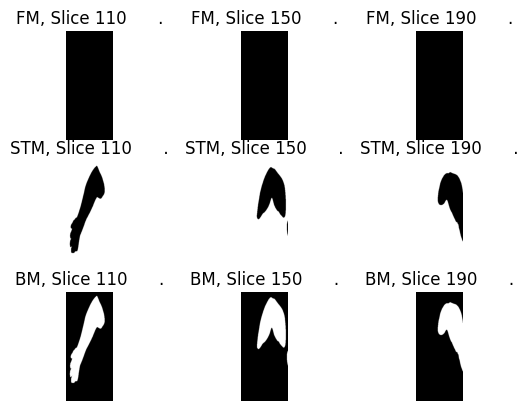

In [45]:
import numpy as np
import matplotlib.pyplot as plt

range_of_fat = (-190, -30)
range_of_soft_tissue = (0, 100)
range_of_bone = (700, 3000)

# Create segmentation masks for each structure
fat_mask = np.logical_and(volume >= range_of_fat[0], volume <= range_of_fat[1])
soft_tissue_mask = np.logical_and(volume >= range_of_soft_tissue[0], volume <= range_of_soft_tissue[1])
bone_mask = np.logical_and(volume >= range_of_bone[0], volume <= range_of_bone[1])

fat_mask = fat_mask.astype(np.int16)
soft_tissue_mask = soft_tissue_mask.astype(np.int16)
bone_mask = bone_mask.astype(np.int16)

# Visualize 3 slices per structure
slices = [110, 150, 190]
for i in range(len(slices)):
    slice_index = slices[i]
    
    # FM
    plt.subplot(3, 3, i+1)
    plt.imshow(fat_mask[slice_index,:,:], cmap='gray')
    plt.title("FM, Slice {}      .".format(slice_index))
    plt.axis('off')
    
    # STM
    plt.subplot(3, 3, i+4)
    plt.imshow(soft_tissue_mask[slice_index,:,:], cmap='gray')
    plt.title("STM, Slice {}      .".format(slice_index))
    plt.axis('off')
    
    # BM
    plt.subplot(3, 3, i+7)
    plt.imshow(bone_mask[slice_index,:,:], cmap='gray')
    plt.title("BM, Slice {}      .".format(slice_index))
    plt.axis('off')
    
plt.show()

In [46]:
# Are the segmentations good?

' No, by seeing the images I don't think these are good segmentations. '

In [47]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""